<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Missing Values**


Estimated time needed: **30** minutes


Data wrangling is the process of cleaning, transforming, and organizing data to make it suitable for analysis. Finding and handling missing values is a crucial step in this process to ensure data accuracy and completeness. In this lab, you will focus exclusively on identifying and handling missing values in the dataset.


## Objectives


After completing this lab, you will be able to:


-   Identify missing values in the dataset.

- Quantify missing values for specific columns.

- Impute missing values using various strategies.


## Hands on Lab


##### Setup: Install Required Libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy

##### Import Necessary Modules:


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Tasks


<h2>1. Load the Dataset</h2>
<p>
We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:



In [3]:
# Define the URL of the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head(5))


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

### 2. Explore the Dataset
##### Task 1: Display basic information and summary statistics of the dataset.


In [4]:
## Write your code here

print("Basic Information:\n")
df.info()

print("\n Summary Statistics (Numerical Columns)\n")
print (df.describe())

#df.info()
#df.describe()
#print(df.head())
#print (df.tail())
#print (df.shape)
#print (df.isnull().sum())

Basic Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65457 entries, 0 to 65456
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB

 Summary Statistics (Numerical Columns)

         ResponseId      CompTotal       WorkExp  JobSatPoints_1  \
count  65457.000000   3.374400e+04  29664.000000    29330.000000   
mean   32714.493591  2.963490e+145     11.466323       18.578998   
std    18892.431636  5.443794e+147      9.168205       25.965347   
min        1.000000   0.000000e+00      0.000000        0.000000   
25%    16354.000000   6.000000e+04      4.000000        0.000000   
50%    32716.000000   1.100000e+05      9.000000       10.000000   
75%    49076.000000   2.500000e+05     16.000000       22.000000   
max    65437.000000  1.000000e+150     50.000000      100.000000   

       JobSatPoints_4  JobSatPoints_5  JobSatPoints_6  JobSatPoints_7  \
count    29399.000000    29417.000000    29456.000000    29454.0000

In [6]:
print ("In Full Summary (Including non-numeric columns):\n")
print (df.describe(include='all'))

In Full Summary (Including non-numeric columns):

          ResponseId                      MainBranch              Age  \
count   65457.000000                           65457            65457   
unique           NaN                               5                8   
top              NaN  I am a developer by profession  25-34 years old   
freq             NaN                           50219            23913   
mean    32714.493591                             NaN              NaN   
std     18892.431636                             NaN              NaN   
min         1.000000                             NaN              NaN   
25%     16354.000000                             NaN              NaN   
50%     32716.000000                             NaN              NaN   
75%     49076.000000                             NaN              NaN   
max     65437.000000                             NaN              NaN   

                 Employment                            RemoteWork   Check

### 3. Finding Missing Values
##### Task 2: Identify missing values for all columns.


In [10]:
## Write your code here
missing_counts = df.isnull().sum()
missing_percentages = (missing_counts / len(df)) * 100

missing_summary = pd.DataFrame({
    'Missing Values': missing_counts,
    'Missing %': missing_percentages.round(2)
})

missing_summary = missing_summary[missing_summary['Missing Values'] > 0]

print ("Missing Values Summary:\n")
print (missing_summary.sort_values(by='Missing Values', ascending=False))

Missing Values Summary:

                            Missing Values  Missing %
AINextMuch less integrated           64309      98.25
AINextLess integrated                63102      96.40
AINextNo change                      52955      80.90
AINextMuch more integrated           52018      79.47
EmbeddedAdmired                      48718      74.43
...                                    ...        ...
YearsCode                             5570       8.51
NEWSOSites                            5151       7.87
LearnCode                             4950       7.56
EdLevel                               4654       7.11
AISelect                              4531       6.92

[109 rows x 2 columns]


##### Task 3: Visualize missing values using a heatmap (Using seaborn library).



In [11]:
## Write your code here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

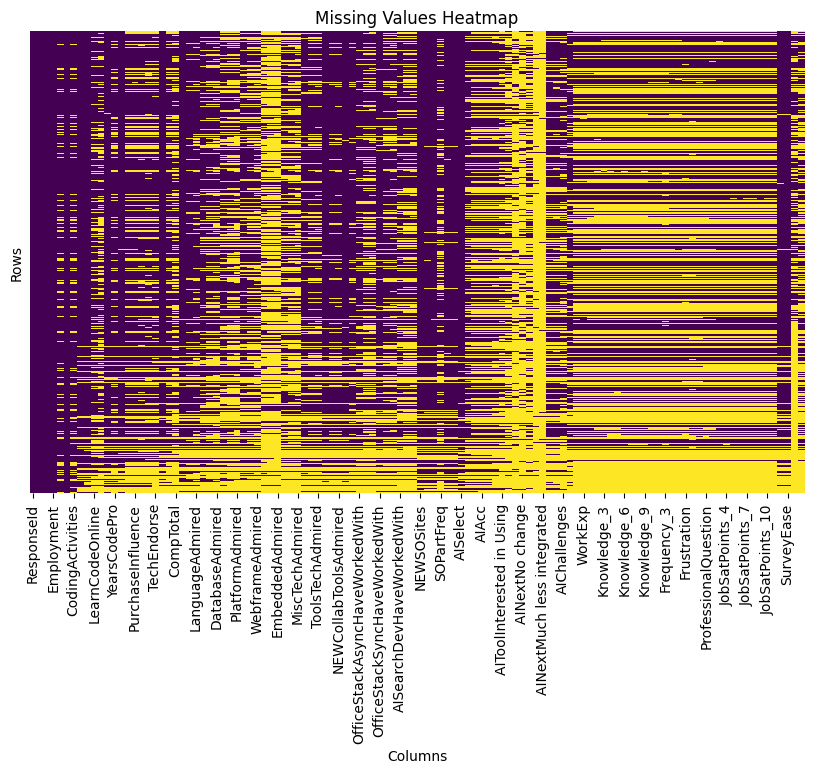

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

##### Task 4: Count the number of missing rows for a specific column (e.g., `Employment`).


In [22]:
column_employment ='Employment'
missing_count1 = df[column_employment].isnull().sum()
print (f"Missing Rows in '{column_name}': {missing_count1}")

column_comptotal ='CompTotal'
missing_count2 = df[column_comptotal].isnull().sum()
print (f"Missing Rows in '{column_comptotal}': {missing_count2}")



Missing Rows in 'Employment': 0
Missing Rows in 'CompTotal': 31713


### 4. Imputing Missing Values
##### Task 5: Identify the most frequent (majority) value in a specific column (e.g., `Employment`).


In [25]:
column_name = 'Employment'

if column_name in df.columns:
    if df[column_name].dropna().empty:
        print (f"The column '{column_name}' exists but contains no non-nul values.")
    else:
        most_frequent = df[column_name].mode()[0]
        count = df[column_name].value_counts()[most_frequent]
        print (f"The most frequent value in '{column_name}' is: '{most_frequent}'")
        print (f"It appears {count} times.")


The most frequent value in 'Employment' is: 'Employed, full-time'
It appears 39051 times.


##### Task 6: Impute missing values in the `Employment` column with the most frequent value.



In [29]:
## Write your code here
column_name = 'Employment'

if column_name in df.columns:
    if df[column_name].dropna().empty:
        print (f"The column '{column_name}' exists but has no non-null values to impute from.")
    else:
        most_frequent = df[column_name].mode()[0]
        print(f"Filled missing values in '{column_name}with the most frequent values: '{most_frequent}'")
        print(f"Remaining missing in '{column_name}': {df[column_name].isnull().sum()}")

Filled missing values in 'Employmentwith the most frequent values: 'Employed, full-time'
Remaining missing in 'Employment': 0


### 5. Visualizing Imputed Data
##### Task 7: Visualize the distribution of a column after imputation (e.g., `Employment`).


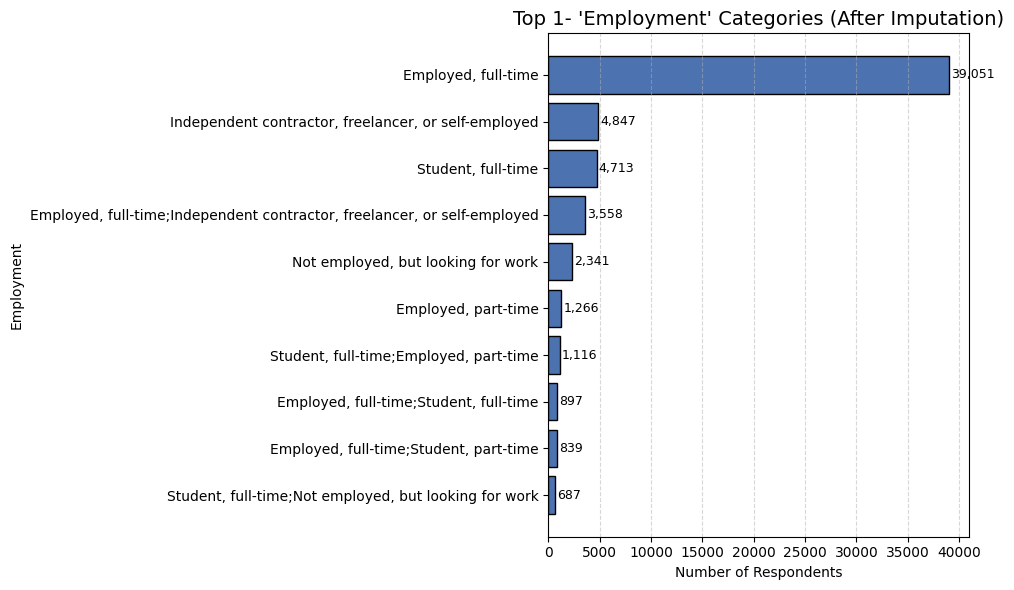

In [36]:
## Write your code here
column_name = 'Employment'

if df[column_name].isnull().sum() > 0:
    most_frequent = df[column_name].mode()[0]
    df[column_name].fllna(most_frequent, inplace=True)

top_10 = df[column_name].value_counts().nlargest(10).sort_values()

plt.figure(figsize=(10,6))
bars = plt.barh(top_10.index, top_10.values, color='#4C72B0', edgecolor='black')

for bar in bars:
    plt.text(bar.get_width() + 200, 
             bar.get_y() + bar.get_height() /2,
             f'{int(bar.get_width()):,}',
             va='center', fontsize=9)

plt.title(f"Top 1- '{column_name}' Categories (After Imputation)", fontsize=14)
plt.xlabel("Number of Respondents")
plt.ylabel(column_name)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()

### Summary


In this lab, you:
- Loaded the dataset into a pandas DataFrame.
- Identified missing values across all columns.
- Quantified missing values in specific columns.
- Imputed missing values in a categorical column using the most frequent value.
- Visualized the imputed data for better understanding.
  


Copyright © IBM Corporation. All rights reserved.
